In [11]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [13]:
blockSize = 1024
ntype = 2
#theme = '1-109th_macaque_fovea_v1'
theme = '1-218_macaque_fovea_v1'
pos_file = f'{theme}_3d_pos.bin'
posR_file = f'{theme}_reshaped_pos.bin'
pos = np.fromfile(pos_file)
mat_file = f'{theme}_mat.bin'
vec_file = f'{theme}_vec.bin'
blkPos_file = f'{theme}_blkPos.bin'
nabaBlk_file = f'{theme}_neighborBlk.bin'
stats_file = f'{theme}_stats.bin'

In [14]:
nblock = pos.size//3//blockSize
networkSize = nblock*blockSize
pos = np.reshape(pos, (3,nblock,blockSize))

In [15]:
# check that pos is untempered
with open(posR_file,'rb') as f:
    pos2d = np.reshape(np.fromfile(f, 'f4', count = 2*networkSize),(2,networkSize))

In [16]:
# read block center pos
with open(blkPos_file, 'rb') as f:
    blkPos = np.fromfile(f, 'f4', count = 2*nblock)
blkPos = np.reshape(blkPos, (2,nblock))
# read block neighbor id
with open(nabaBlk_file,'rb') as f:
    nNabaBlk = np.fromfile(f, 'u4', count = nblock)
    nabaBlkId = np.empty(nblock,dtype=object)
    for i in range(nblock):
        nabaBlkId[i] = np.fromfile(f, 'u4', count = nNabaBlk[i])            

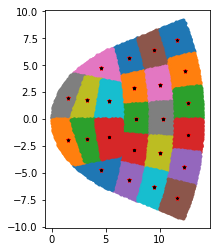

In [17]:
fig = plt.figure('pos')
ax = fig.add_subplot(111)
nlim0 = 0
nlim1 = nblock
for i in range(nlim0, nlim1):
    plt.plot(pos[0,i,:], pos[1,i,:], '.')
    plt.plot(blkPos[0,i], blkPos[1,i], '*r', ms = 5)
for i in range(nlim0, nlim1):
    for j in range(nNabaBlk[i]):
        plt.plot(blkPos[0,nabaBlkId[i]], blkPos[1,nabaBlkId[i]], 'dk', ms = 1)
ax.set_aspect('equal')

In [18]:
with open(mat_file, 'rb') as f:
    conMat = np.reshape(np.fromfile(f, 'f4', count = networkSize*blockSize),(nblock, blockSize, blockSize)) # pre, post
    delayMat = np.reshape(np.fromfile(f, 'f4', count = networkSize*blockSize),(nblock, blockSize, blockSize))

with open(vec_file, 'rb') as f:
    nVec = np.fromfile(f, 'u4', count = networkSize)
    vecID = np.empty(networkSize,dtype=object)
    conVec = np.empty(networkSize,dtype=object)
    delayVec = np.empty(networkSize,dtype=object)
    for i in range(networkSize):
        if nVec[i] > 0:
            vecID[i] = np.fromfile(f, 'u4', count = nVec[i])
            conVec[i] = np.fromfile(f, 'f4', count = nVec[i])
            delayVec[i] = np.fromfile(f, 'f4', count = nVec[i])
        else:
            vecID[i] = np.array([])
            conVec[i] = np.array([])
            delayVec[i] = np.array([])

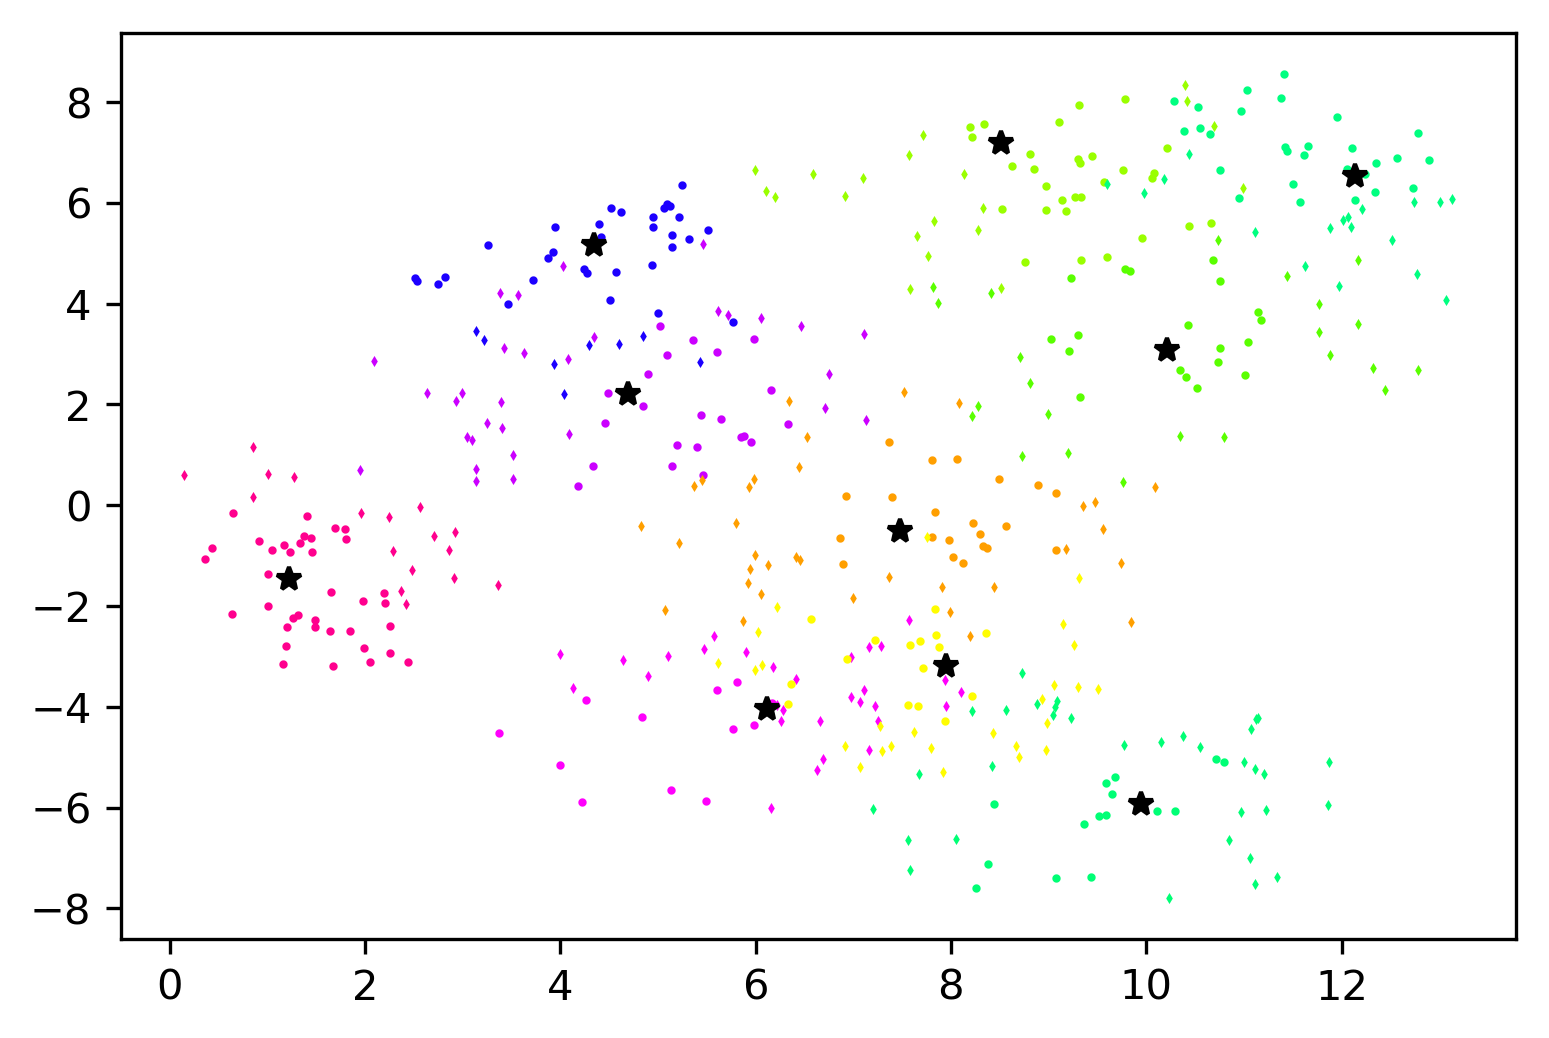

In [19]:
fig = plt.figure('con', dpi = 300)
ax = fig.add_subplot(111)
np.random.seed(1019473)
example = np.random.randint(0,networkSize,(10,))
for i in example:
    color = mpl.colors.hsv_to_rgb([i/networkSize, 1, 1])
    bid = i//blockSize
    tid = i-blockSize*bid
    bidRange = np.arange(bid * blockSize, (bid+1)*blockSize)
    mat_pick = bidRange[np.reshape(conMat[bid,:,tid]>0,(blockSize,))]
    ax.plot(pos2d[0,mat_pick], pos2d[1,mat_pick], 'o', c=color, ms = 1)
    if nVec[i] > 0:
        #print(f'{nVec[i]}')
        vec_pick = vecID[i]
        #print(vec_pick)
        ax.plot(pos2d[0,vec_pick], pos2d[1,vec_pick], 'd', c=color, ms = 0.5)
    ax.plot(pos2d[0,i],pos2d[1,i],'*k')

In [20]:
for i in range(networkSize):
    if sum(conVec[i]) == 0 and nVec[i] >0 :
        print(i)

In [21]:
with open(stats_file, 'rb') as f:
    connected = np.reshape(np.fromfile(f, 'u4', count=ntype*networkSize), (ntype, networkSize))
    avail = np.reshape(np.fromfile(f, 'u4', count=ntype*networkSize), (ntype, networkSize))
    strength = np.reshape(np.fromfile(f, 'f4', count=ntype*networkSize), (ntype, networkSize))

0 0.0161694840029 0.00586532474757
1 0.018303564572 0.00866557679403


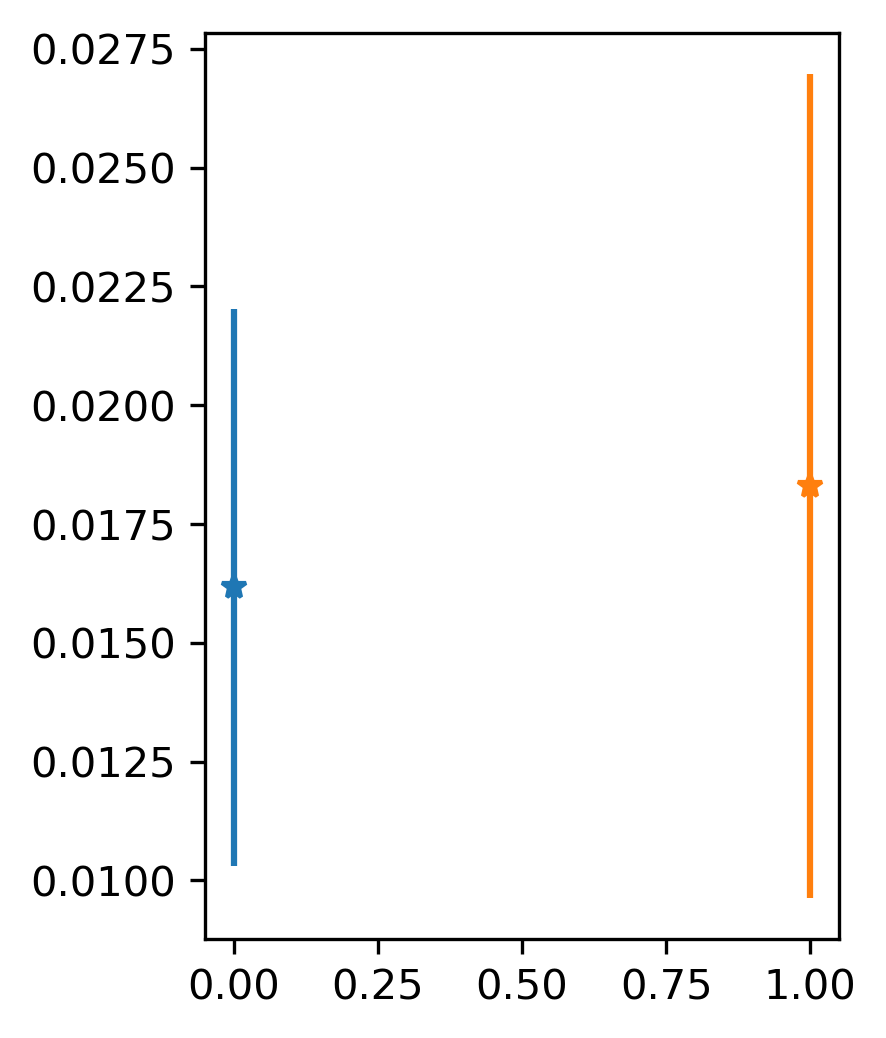

In [22]:
fig = plt.figure('stats', dpi = 300)
ax = fig.add_subplot(121)
for i in range(ntype):
    target = connected[i,:]/avail[i,:]
    print(i, np.average(target), np.std(target))
    ax.errorbar(i, np.average(target), np.std(target), marker='*')
    #target = strength/connected
    #ax.errorbar(i+0.5, np.average(target), np.std(target))

In [23]:
mindis = np.float('inf')
meandis = 0
for i in range(1,nblock):
    p2 = np.power(blkPos - np.roll(blkPos,i,1),2)
    dis = np.sqrt(np.sum(p2,0))
    mind = np.min(dis)
    meandis = meandis + np.sum(dis)
    if mindis > mind:
        mindis = mind
print(meandis/2/(nblock*(nblock-1)))
print(mindis)

3.55942531945
1.84145


In [164]:
a = np.arange(0,10).reshape(2,5)

In [174]:
np.roll(a,1,1)

array([[4, 0, 1, 2, 3],
       [9, 5, 6, 7, 8]])

(0, 1)

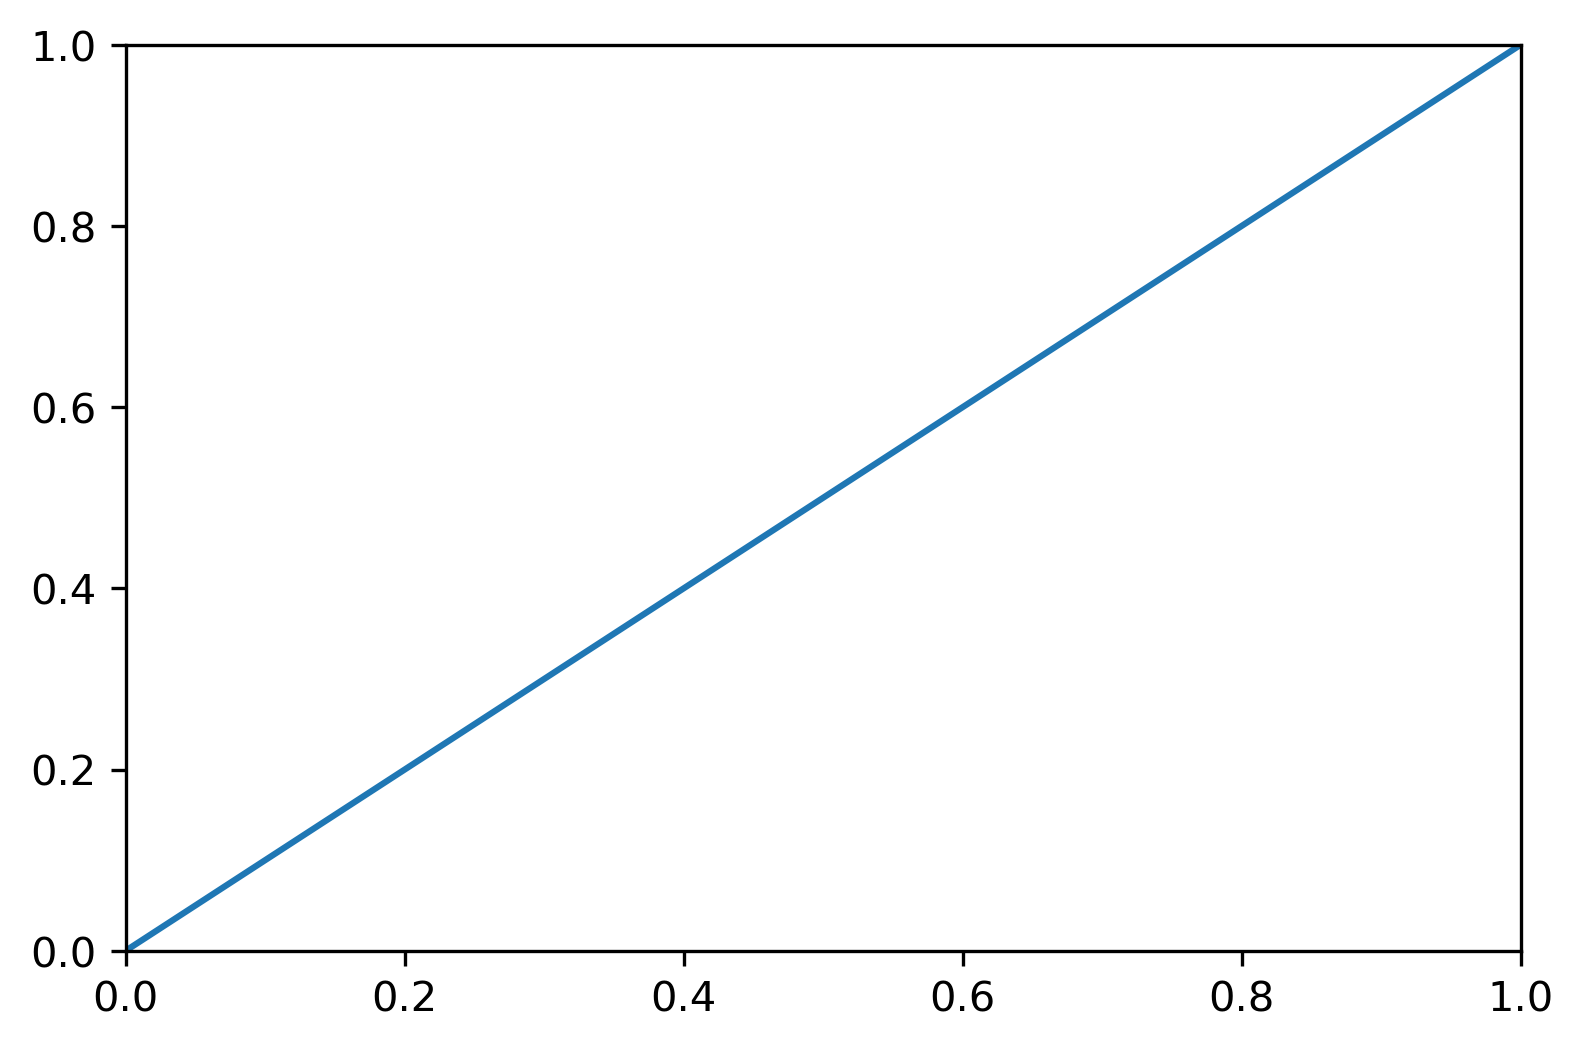